<a href="https://colab.research.google.com/github/davadeola/Photo-Image-Classification/blob/main/New_Data_set_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
train_path='/content/drive/MyDrive/new-dataset/train'
test_path='/content/drive/MyDrive/new-dataset/test'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import math
import warnings
warnings.filterwarnings("ignore")

In [3]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model,load_model
conv_base =  InceptionV3(weights='imagenet',include_top=False,
                         input_shape=(300, 300, 3))
output = conv_base.layers[-1].output
output = keras.layers.Flatten()(output)
model_tl = Model(conv_base.input, output)
model_tl.trainable = False

for layer in model_tl.layers:
    layer.trainable = False
    layers = [(layer, layer.name, layer.trainable) for layer in model_tl.layers]
    model_layers=pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])
print(model_layers) 

87924736/87910968 [==============================] - 1s 0us/step
                                            Layer Type  ... Layer Trainable
0    <keras.engine.input_layer.InputLayer object at...  ...           False
1    <keras.layers.convolutional.Conv2D object at 0...  ...           False
2    <keras.layers.normalization.batch_normalizatio...  ...           False
3    <keras.layers.core.activation.Activation objec...  ...           False
4    <keras.layers.convolutional.Conv2D object at 0...  ...           False
..                                                 ...  ...             ...
307  <keras.layers.merge.Concatenate object at 0x7f...  ...           False
308  <keras.layers.merge.Concatenate object at 0x7f...  ...           False
309  <keras.layers.core.activation.Activation objec...  ...           False
310  <keras.layers.merge.Concatenate object at 0x7f...  ...           False
311  <keras.layers.core.flatten.Flatten object at 0...  ...           False

[312 rows x 3 columns]

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

test_size=400
batch_size=32
epochs=25

target_size=(300,300) #resize all images to 300x300
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,  
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range = [0.8, 1.2],
                                   fill_mode='nearest',        
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
                  train_path,
                  target_size=target_size,#  
                  batch_size=batch_size,
                  class_mode='categorical',
                  subset='training')
validation_generator = train_datagen.flow_from_directory(
                       train_path,
                       target_size=target_size,
                       batch_size=batch_size,
                       class_mode='categorical',
                       subset='validation')

Found 2556 images belonging to 4 classes.
Found 637 images belonging to 4 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import optimizers
import tensorflow as tf

# building a linear stack of layers with the sequential model
model =Sequential()
model.add(model_tl)
# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(4, activation='softmax'))



# compiling the sequential model
model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(1e-5),
              metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 131072)            21802784  
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 38,580,644
Trainable params: 16,777,860
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [6]:
from keras.callbacks import *
filepath="/content/drive/My Drive/MyCNN/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_acc', 
                             verbose=1,
                             save_best_only=False,
                             save_freq='epoch',     
                             mode='max')
callbacks_list = [EarlyStopping(patience = 5),checkpoint]

In [7]:
history = model.fit(
          train_generator,
          steps_per_epoch=train_generator.samples//batch_size,    
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          callbacks=callbacks_list)

Epoch 1/25
79/79 [==============================] - ETA: 0s - loss: 0.7518 - acc: 0.7009
Epoch 00001: saving model to /content/drive/My Drive/MyCNN/epochs:001-val_acc:0.817.hdf5
79/79 [==============================] - 953s 12s/step - loss: 0.7518 - acc: 0.7009 - val_loss: 0.4974 - val_acc: 0.8174
Epoch 2/25
79/79 [==============================] - ETA: 0s - loss: 0.4271 - acc: 0.8380
Epoch 00002: saving model to /content/drive/My Drive/MyCNN/epochs:002-val_acc:0.880.hdf5
79/79 [==============================] - 105s 1s/step - loss: 0.4271 - acc: 0.8380 - val_loss: 0.3373 - val_acc: 0.8799
Epoch 3/25
79/79 [==============================] - ETA: 0s - loss: 0.3701 - acc: 0.8586
Epoch 00003: saving model to /content/drive/My Drive/MyCNN/epochs:003-val_acc:0.908.hdf5
79/79 [==============================] - 104s 1s/step - loss: 0.3701 - acc: 0.8586 - val_loss: 0.2957 - val_acc: 0.9079
Epoch 4/25
79/79 [==============================] - ETA: 0s - loss: 0.3291 - acc: 0.8752
Epoch 00004: sav

20/20 [==============================] - 27s 1s/step - loss: 0.2244 - acc: 0.9152
Train Accuracy: 93.70%
Validation Accuracy: 91.52%


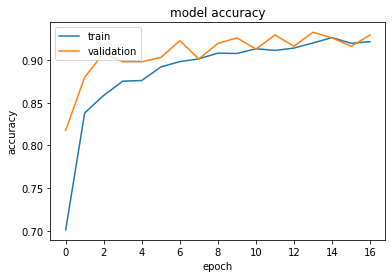

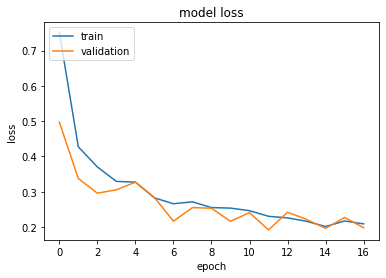

In [8]:
# Model evaluation
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(validation_generator,verbose=1)

print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))

#For plotting Accuracy and Loss
def LearningCurve(history):

  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

LearningCurve(history)

#Save the trained model to a file 
model_weight_file='/content/drive/MyDrive/MyCNN/event_detect_model_transfer-fine.h5'
model.save(model_weight_file)

In [ ]:
!pip install tensorflowjs
import tensorflowjs as tfjs

In [10]:
tfjs.converters.save_keras_model(
    model,
    "/content/drive/MyDrive/MyCNN/model_js_fine_1"
)

!zip -r /content/drive/MyDrive/MyCNN/event-detection-model-fine.zip /content/drive/MyDrive/MyCNN/model_js_fine_1

  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/ (stored 0%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard1of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard2of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard3of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard4of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard5of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard6of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard7of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard8of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard9of37.bin (deflated 9%)
  adding: content/drive/MyDrive/MyCNN/model_js_fine_1/group1-shard10of37.bin (deflated 9%)
  adding: content/drive/MyDrive/